### Import  libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings("ignore")

### Read data

In [2]:
# boston_dataset = sklearn.datasets.load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

house_price = pd.DataFrame(data,columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
house_price

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
# get the column price

house_price['PRICE'] =list(target)

house_price.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Exploratory Data Analysis 

In [4]:
#visualize and observe the potential output variable for our model

In [5]:
# how data is distributed for every column

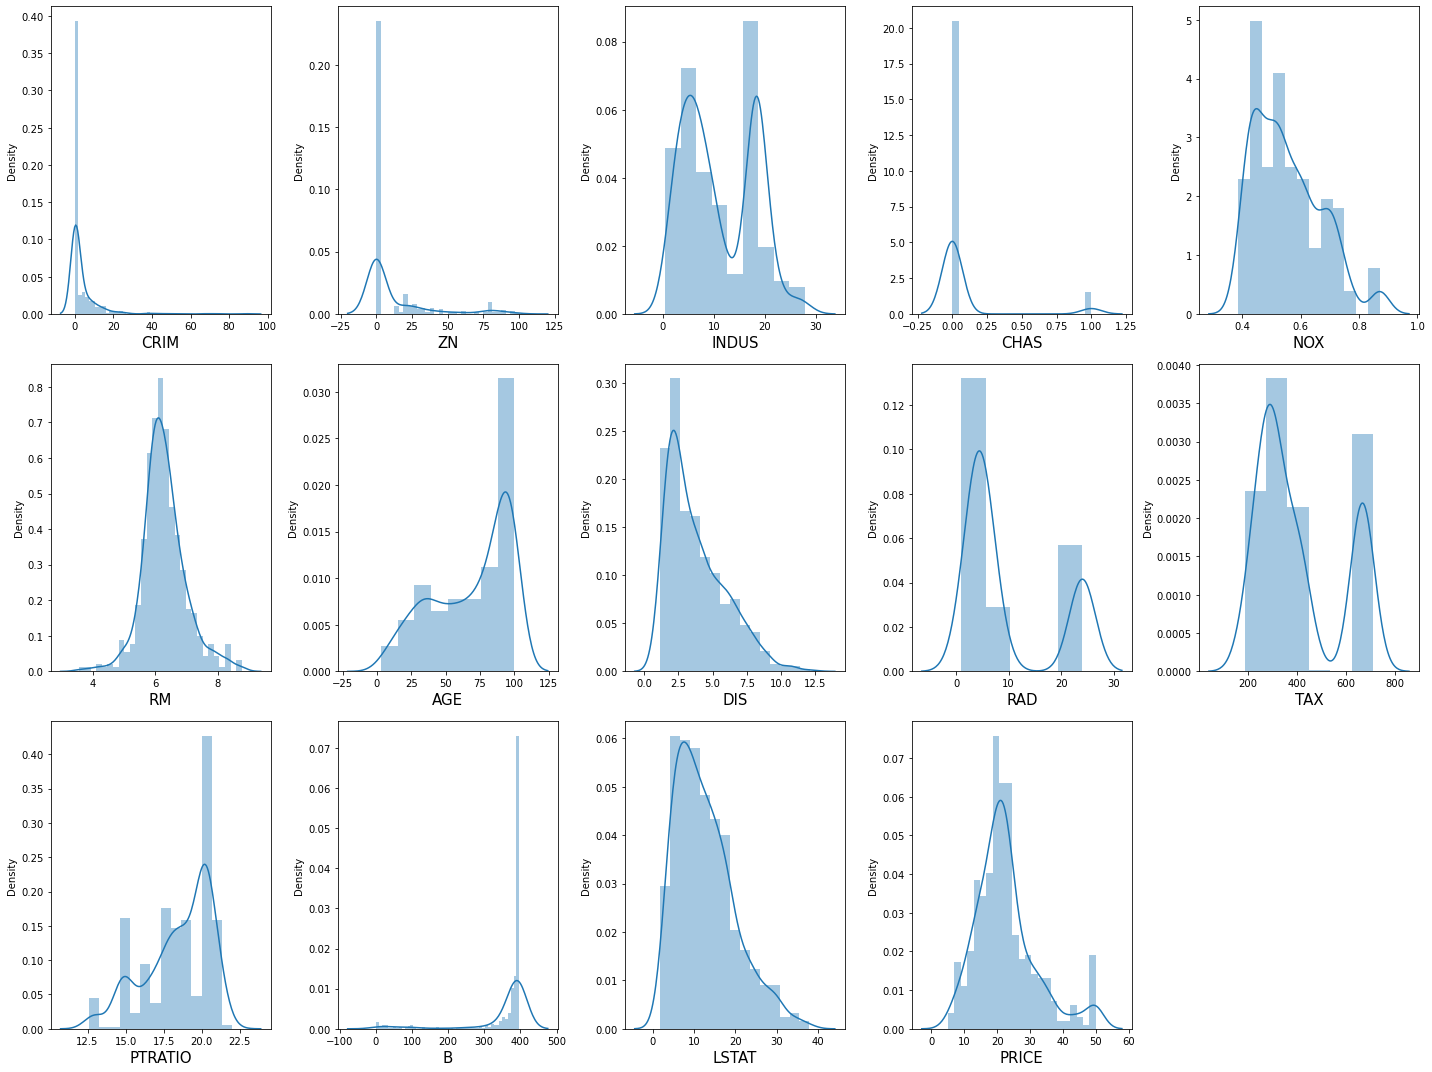

In [6]:
plt.figure(figsize = (20, 15))
index = 1

for column in house_price:
    if index <= 14:
        ax = plt.subplot(3, 5, index)
        sns.distplot(house_price[column])
        plt.xlabel(column, fontsize = 15)
        
    index += 1
    
plt.tight_layout()
plt.show()

In [7]:
# Plotting `Price` with remaining columns


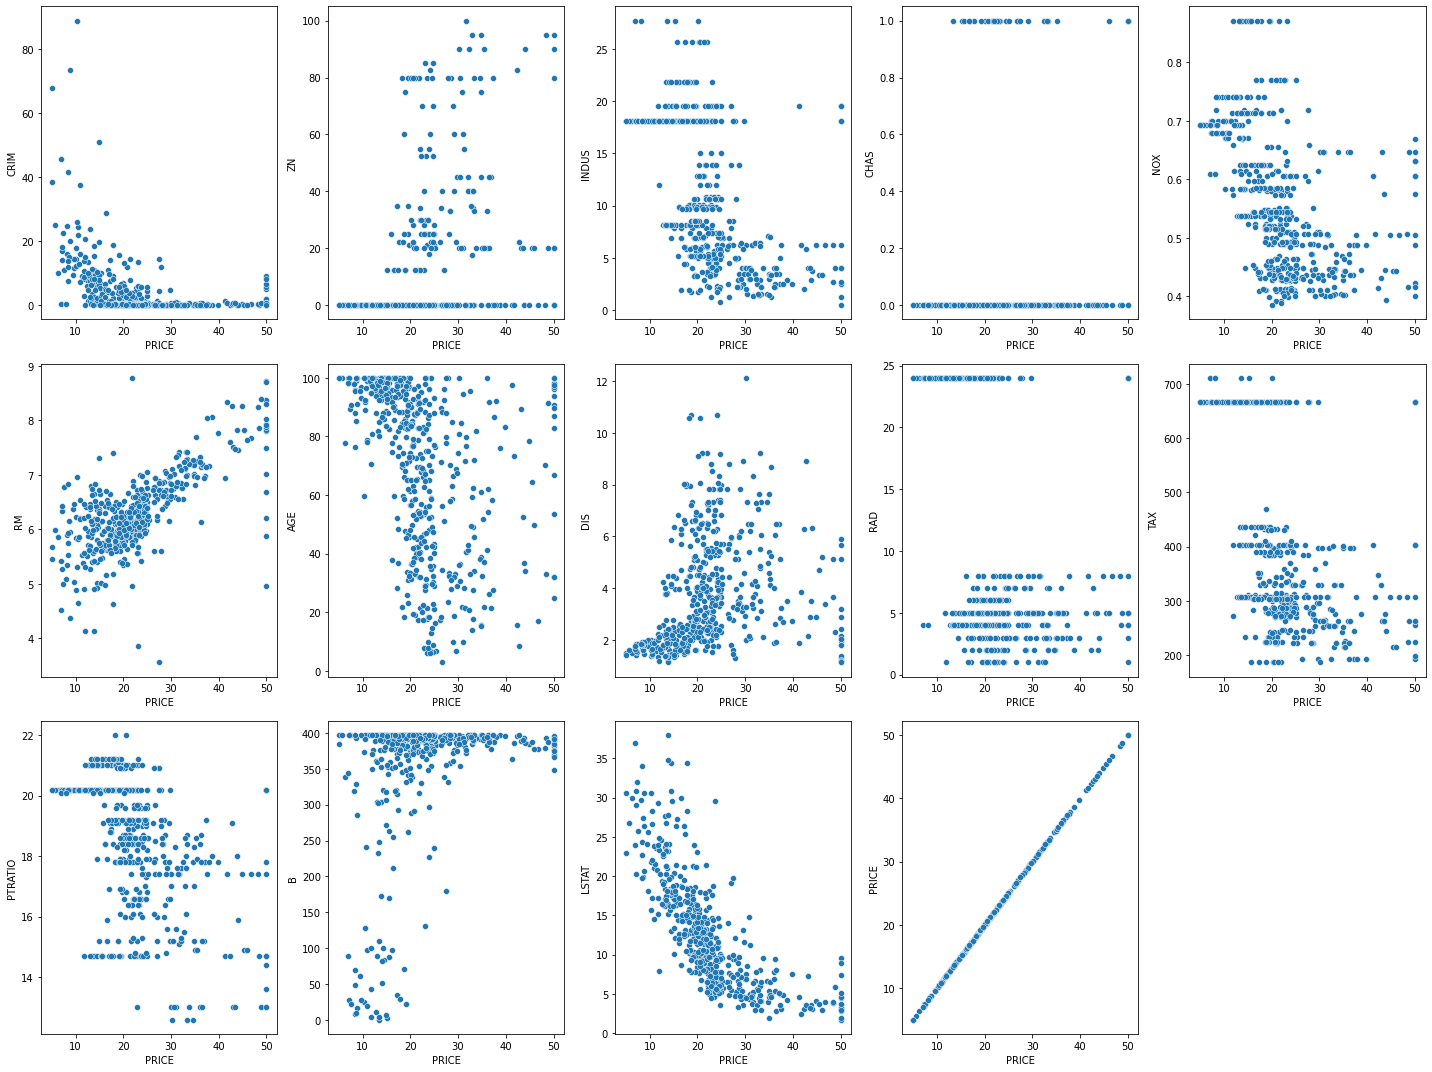

In [8]:

plt.figure(figsize = (20, 15))
index = 1

for column in house_price:
    if index <= 14:
        ax = plt.subplot(3, 5, index)
        sns.scatterplot(x = house_price['PRICE'], y = house_price[column])
        
    index += 1

plt.tight_layout()
plt.show()

### Outliers

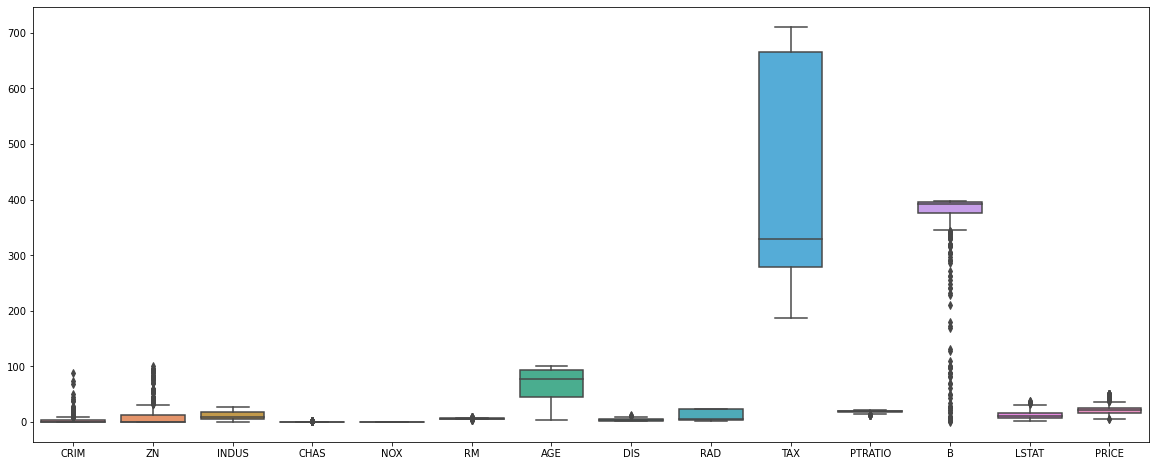

In [9]:

plt.figure(figsize = (20, 8))
sns.boxplot(data = house_price, width = 0.8)
plt.show()

In [10]:
    for k, v in house_price.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        q2 = q3 - q1
        v_col = v[(v <= q1 - 1.5 * q2) | (v >= q3 + 1.5 * q2)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(house_price)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))


Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


In [11]:
#remove price outlier
house_price = house_price[~(house_price['PRICE'] >= 50.0)]
print(np.shape(house_price))

(490, 14)


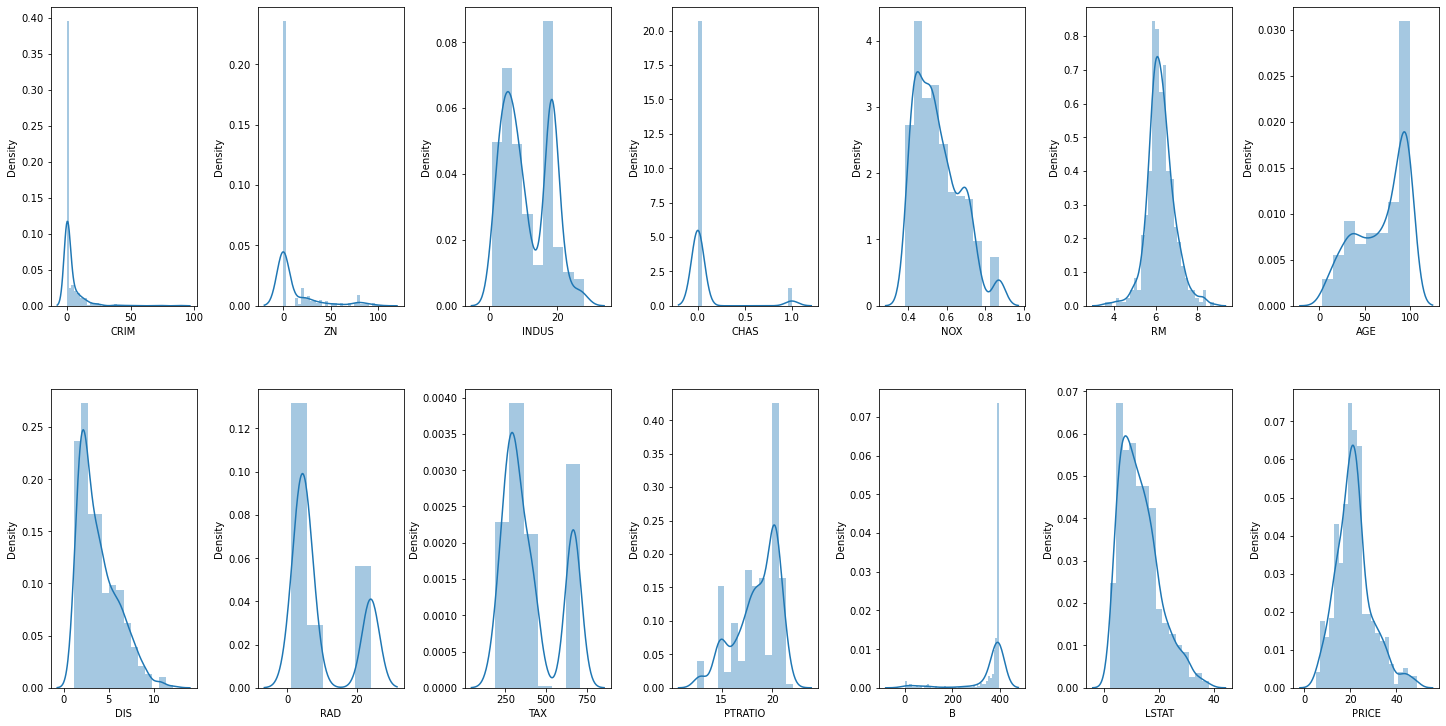

In [12]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in house_price.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [13]:
#The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

### Data Cleaning

In [14]:
house_price.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

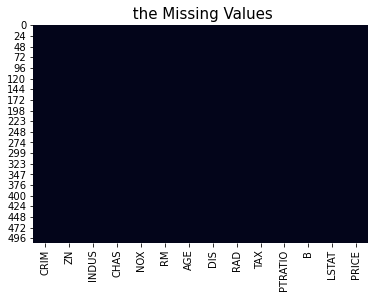

In [15]:
sns.heatmap(house_price.isnull(), cbar = False)
plt.title(' the Missing Values',  fontsize = 15)
plt.show()

In [16]:
house_price.duplicated().sum()

0

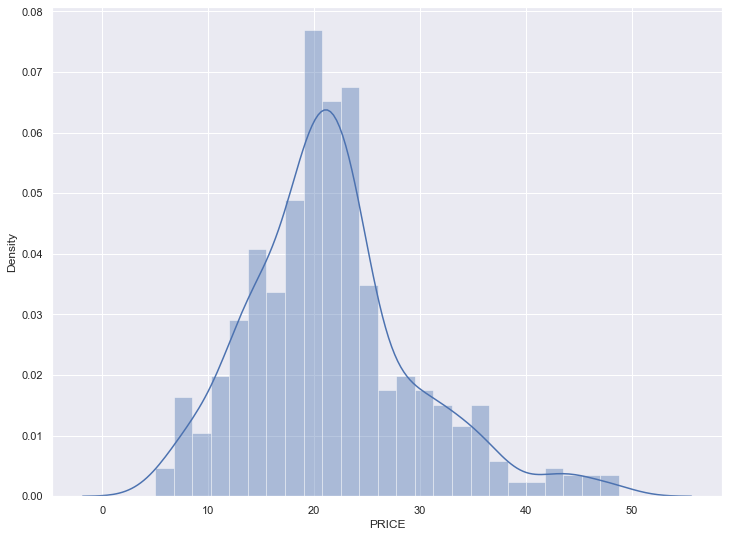

In [17]:
house_price.isnull().sum()
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(house_price['PRICE'], bins=25)
plt.show()

### Info about data

In [18]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    float64
 4   NOX      490 non-null    float64
 5   RM       490 non-null    float64
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    float64
 9   TAX      490 non-null    float64
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
 13  PRICE    490 non-null    float64
dtypes: float64(14)
memory usage: 57.4 KB


In [19]:
house_price.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   

In [20]:
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


### Get correlation between Price and all columns

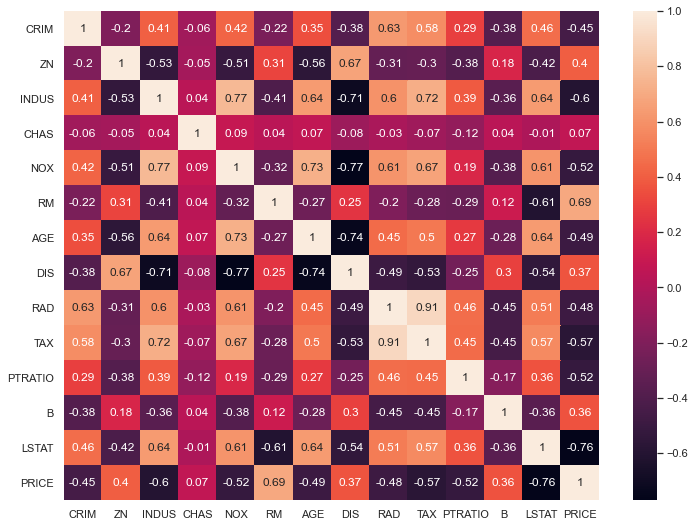

In [21]:
correlation_matrix = house_price.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [22]:

 #RM: average number of rooms per dwelling has a high **POSITIVE** correlation with PRICE (0.7).#

 #LSTAT: % lower status of the population has a high **NEGATIVE** corrleation with PRICE (-0.74)

 #LSTAT and RM have a fairly strong correlation between themselves too (0.61) - not ideal.

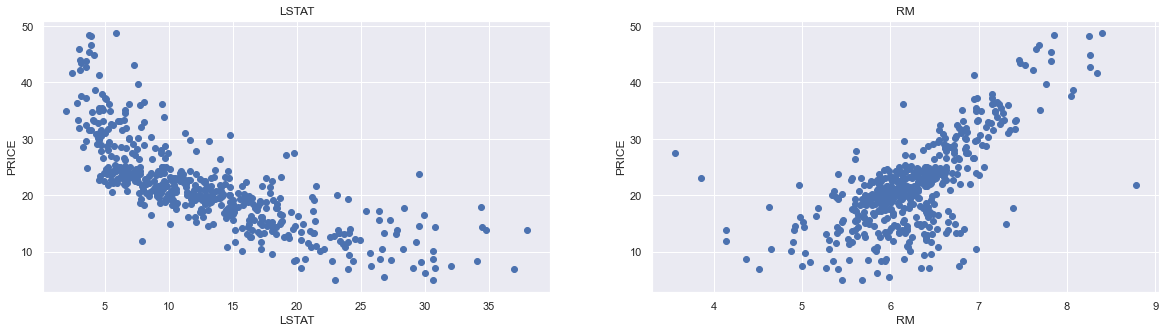

In [23]:
plt.figure(figsize=(20, 5))
features=['LSTAT','RM']
target=house_price['PRICE']
for i,col in enumerate(features):
	plt.subplot(1,len(features),i+1)
	x=house_price[col]
	y=target
	plt.scatter(x,y,marker='o')
	plt.title(col)
	plt.xlabel(col)
	plt.ylabel('PRICE')
plt.show()


### Creat Module

### Model Training : Linear Regression Model acc 75%


In [24]:
X = house_price[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
y = house_price['PRICE']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=0)


In [26]:
LR = LinearRegression()


In [27]:
LR.fit(X_train,y_train)


LinearRegression()

In [28]:
print("Accuracy --> ", LR.score(X_test, y_test)*100)


Accuracy -->  75.76943680852786


In [29]:
predictions = LR.predict(X_test)


In [30]:
error_score = metrics.r2_score(y_test, predictions) # coefficient of determination, regression score function.
print('R squared error : ', error_score *100)

R squared error :  75.76943680852786


### Model Training : Random Forest Regressor acc 82.3%


In [31]:
regressor = RandomForestRegressor(n_estimators=100)


In [32]:
regressor

RandomForestRegressor()

In [33]:
regressor.fit(X_train, y_train)


RandomForestRegressor()

In [34]:
print("Accuracy --> ", regressor.score(X_test, y_test)*100)


Accuracy -->  82.15618098210481


In [35]:
test_data_prediction = regressor.predict(X_test)


In [36]:
error_score = metrics.r2_score(y_test, test_data_prediction) # coefficient of determination, regression score function.
print('R squared error : ', error_score *100)

R squared error :  82.15618098210481


### Model Training : Gradient Boosting Regressor .. acc 82%


In [37]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)


In [38]:
gbr = regressor.fit(X_train,y_train)


In [39]:
print("Accuracy --> ",gbr.score(X_test, y_test)*100)


Accuracy -->  82.59275825259206


In [40]:
test_data_prediction1 = gbr.predict(X_test)


In [41]:
error_score = metrics.r2_score(y_test, test_data_prediction1 ) # coefficient of determination, regression score function.
print('R squared error : ', error_score *100)

R squared error :  82.59275825259206
